In [1]:
!python dgemm.py

[2018-07-09 14:42:17][INFO] [frontend] oarsub -q testing -t allow_classic_ssh -l "{cluster in ('dahu')}/nodes=1,walltime=02:00:00" -r "2018-07-09 14:42:17"
[2018-07-09 14:42:19][INFO] Job(1803657)
[2018-07-09 14:42:19][INFO] [frontend] oarstat -fJ -j 1803657
[2018-07-09 14:42:26][INFO] [frontend] oarstat -fJ -j 1803657
[2018-07-09 14:42:37][INFO] [frontend] oarstat -fJ -j 1803657
[2018-07-09 14:42:57][INFO] [frontend] oarstat -fJ -j 1803657
[2018-07-09 14:43:40][INFO] [frontend] oarstat -fJ -j 1803657
[2018-07-09 14:44:47][INFO] [frontend] oarstat -fJ -j 1803657
[2018-07-09 14:45:49][INFO] [frontend] oarstat -fJ -j 1803657
[2018-07-09 14:45:49][INFO] Node: dahu-9.grenoble.grid5000.fr
[2018-07-09 14:45:49][INFO] [allnodes] cd /tmp && hostname
[2018-07-09 14:45:49][INFO] [allnodes] cd /tmp && sudo-g5k apt update && sudo-g5k apt upgrade -y
[2018-07-09 14:46:13][INFO] [allnodes] cd /tmp && sudo-g5k apt install -y build-essential zip make git time hwloc pciutils cmake
[2018-07-09 14:46:14][

In [2]:
%matplotlib inline
import pandas
import pytree
print(pytree.__version__)
print(pytree.__git_version__)

0.0.5
bb16b289288440b67ae6f3afc5c2ab120ce50175


In [3]:
df = pandas.read_csv('result.csv')
df['size_product'] = df.m * df.n * df.k
df['gflops'] = (2 * df.m * df.n * df.k / df.time) * 1e-9
df.head()

,time,m,n,k,lead_A,lead_B,lead_C,automatic_offloading,hostname,date,size_product,gflops
0,0.254156,5862,4964,3034,5862,5862,5862,False,dahu-9.grenoble.grid5000.fr,2018/07/09,88286268912,694.740781
1,0.257493,5862,4964,3034,5862,5862,5862,False,dahu-9.grenoble.grid5000.fr,2018/07/09,88286268912,685.737235
2,0.257467,5862,4964,3034,5862,5862,5862,False,dahu-9.grenoble.grid5000.fr,2018/07/09,88286268912,685.806483
3,0.058798,6947,1466,1818,6947,6947,6947,False,dahu-9.grenoble.grid5000.fr,2018/07/09,18515061036,629.785402
4,0.060755,6947,1466,1818,6947,6947,6947,False,dahu-9.grenoble.grid5000.fr,2018/07/09,18515061036,609.499170


In [4]:
reg = pytree.compute_regression(x=df.size_product, y=df.time).auto_simplify()

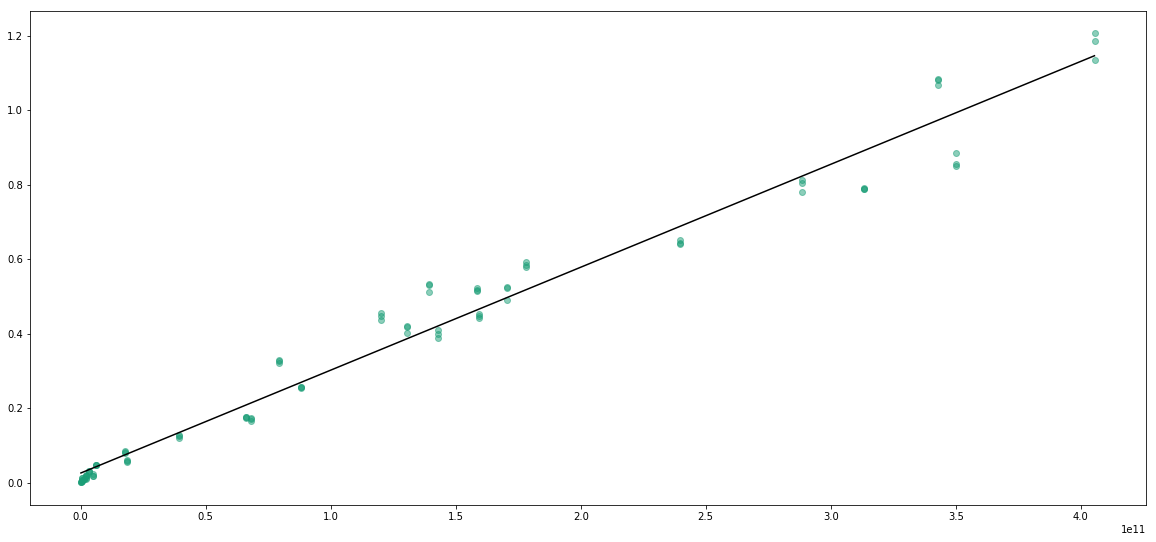

In [5]:
reg.plot_dataset()

In [6]:
reg

-inf < x ≤ inf
	y ~ 2.764e-12x + 2.587e-02

In [7]:
print('%.3f gflops' % ((2/(list(reg.simplify().regression)[-1]).segments[0][-1].coeff) * 1e-9))

723.511 gflops
